## Building a Convolutional Neutal Network Model for FashionMNIST DATASETS

In [3]:
import torch

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## Loading the Dataset

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:27<00:00, 360757.59it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 90822.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:09<00:00, 174591.51it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2047563.28it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
print(train_data), print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


(None, None)

In [7]:
print(train_data.data.size()), print(test_data.data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


(None, None)

### One train_data plot

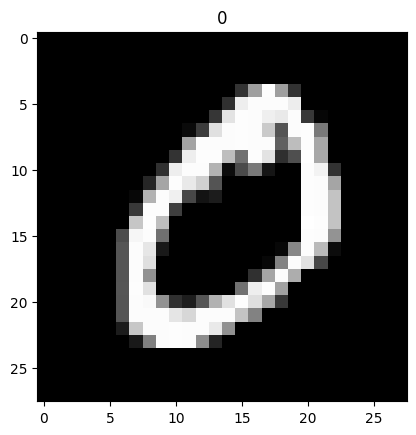

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[1], cmap='gray')
plt.title('%i' % train_data.targets[1])
plt.show()

### Multiple train_data plot


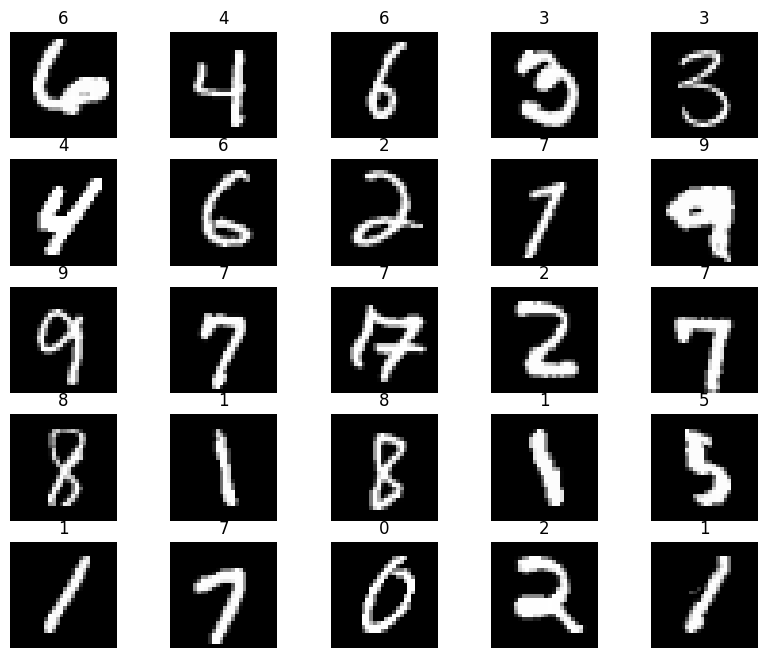

In [12]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## Preparing data for training with DataLoaders

In [14]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=False,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7daf1074aa20>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7daf13b794c0>}

## Defining a COnvolutional Neural Network

In [22]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.conv2(x)

        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [23]:
cnn = CNN()
print(cnn)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


## Loss Function

In [24]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

## Optimization

In [25]:
from torch import optim

optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

## Model Training

In [26]:
from torch.autograd import Variable

num_epochs = 10

def train(num_epochs, cnn, loaders):
    cnn.train()

    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            b_x = Variable(images)
            b_y = Variable(labels)

            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
            pass
        pass

train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1647
Epoch [1/10], Step [200/600], Loss: 0.0606
Epoch [1/10], Step [300/600], Loss: 0.0552
Epoch [1/10], Step [400/600], Loss: 0.1196
Epoch [1/10], Step [500/600], Loss: 0.0841
Epoch [1/10], Step [600/600], Loss: 0.0633
Epoch [2/10], Step [100/600], Loss: 0.0374
Epoch [2/10], Step [200/600], Loss: 0.0693
Epoch [2/10], Step [300/600], Loss: 0.0370
Epoch [2/10], Step [400/600], Loss: 0.0911
Epoch [2/10], Step [500/600], Loss: 0.0404
Epoch [2/10], Step [600/600], Loss: 0.0323
Epoch [3/10], Step [100/600], Loss: 0.0350
Epoch [3/10], Step [200/600], Loss: 0.0396
Epoch [3/10], Step [300/600], Loss: 0.0509
Epoch [3/10], Step [400/600], Loss: 0.0517
Epoch [3/10], Step [500/600], Loss: 0.1358
Epoch [3/10], Step [600/600], Loss: 0.0408
Epoch [4/10], Step [100/600], Loss: 0.0352
Epoch [4/10], Step [200/600], Loss: 0.0160
Epoch [4/10], Step [300/600], Loss: 0.0044
Epoch [4/10], Step [400/600], Loss: 0.0337
Epoch [4/10], Step [500/600], Loss: 0.2340
Epoch [4/10

## Evaluation and Testing

In [27]:
def test():
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        pass
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * accuracy))

test()

Test Accuracy of the model on the 10000 test images: 99.0 %


### 10 predictions from test data

In [29]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [30]:
actual_number = lbls[:10].numpy()
actual_number

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [31]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [7 2 1 0 4 1 4 9 5 9]
Actual number: [7 2 1 0 4 1 4 9 5 9]


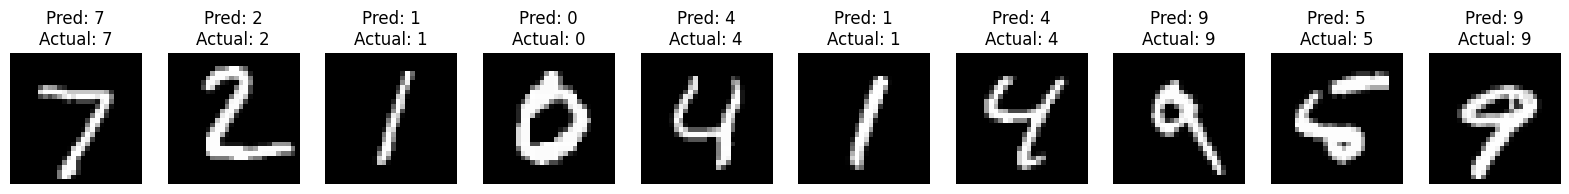

In [33]:
num_images = imgs[:10].shape[0]

fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

for i in range(num_images):
    ax = axes[i]

    img = imgs[i].squeeze().numpy()  
    ax.imshow(img, cmap='gray')
    ax.axis('off')
   
    ax.set_title(f'Pred: {pred_y[i]}\nActual: {actual_number[i]}')

plt.show()